# *Yamila Taschuk 40808792*

# **Ejercicio 1: Espacios de color**


Elijo una imagen a color y la cargo con Open CV


In [37]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [38]:
image = cv2.imread('/content/imagen.jpeg')

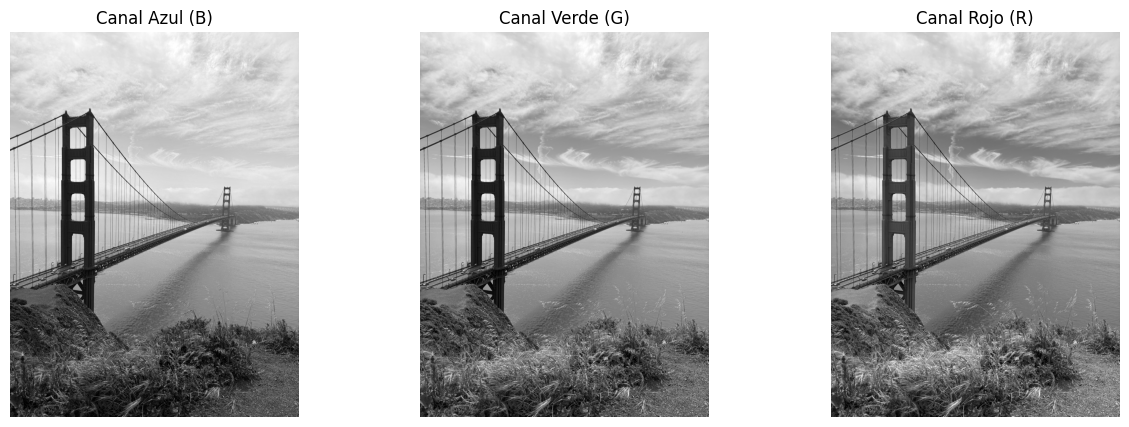

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Verificamos que la imagen se haya cargado
if image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Separar canales BGR
    B, G, R = cv2.split(image)

    # Mostrar los canales por separado
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(B, cmap='gray')
    plt.title('Canal Azul (B)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(G, cmap='gray')
    plt.title('Canal Verde (G)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(R, cmap='gray')
    plt.title('Canal Rojo (R)')
    plt.axis('off')

    plt.show()


In [40]:
# Calculamos valores promedio por canal
mean_B = np.mean(B)
mean_G = np.mean(G)
mean_R = np.mean(R)

print(f"Promedio del Canal Azul (B): {mean_B:.2f}")
print(f"Promedio del Canal Verde (G): {mean_G:.2f}")
print(f"Promedio del Canal Rojo (R): {mean_R:.2f}")

# Determinamos canal con mayor promedio
if mean_B > mean_G and mean_B > mean_R:
    print("El canal con mayor información es: AZUL (B)")
elif mean_G > mean_B and mean_G > mean_R:
    print("El canal con mayor información es: VERDE (G)")
else:
    print("El canal con mayor información es: ROJO (R)")


Promedio del Canal Azul (B): 150.06
Promedio del Canal Verde (G): 146.70
Promedio del Canal Rojo (R): 141.51
El canal con mayor información es: AZUL (B)


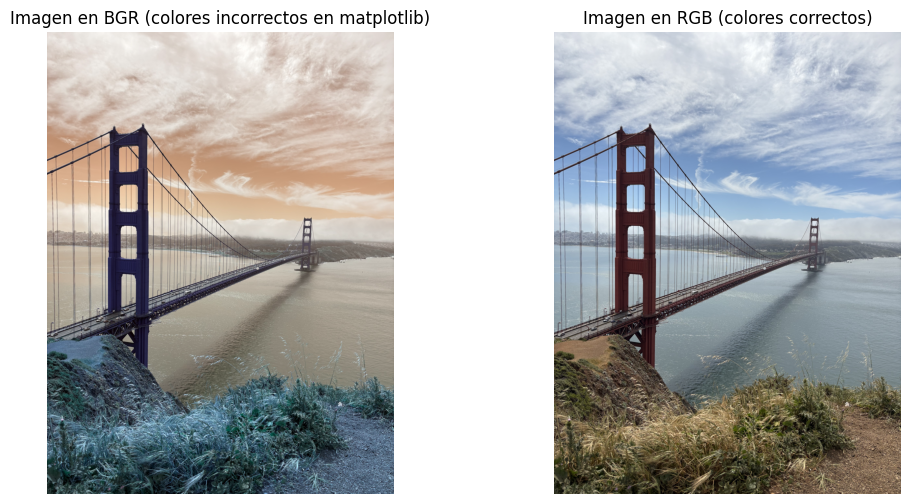

In [41]:
# Convertimos la imagen de BGR a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la diferencia visual
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen en BGR (colores incorrectos en matplotlib)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_rgb)
plt.title('Imagen en RGB (colores correctos)')
plt.axis('off')

plt.show()


Se ven diferentes los colores ya que si cargas una imagen con OpenCV, la imagen está en formato BGR. Pero cuando usas
 la libreria matplotlib.pyplot este espera que la imagen esté en formato RGB. Si no haces la conversión de BGR a RGB, los colores no se mostrarán correctamente:

El color rojo se verá azul.

El color azul se verá rojo.

Los otros colores también se mezclarán de manera incorrecta.

# **Ejercicio 2: Muestreo y Cuantización**






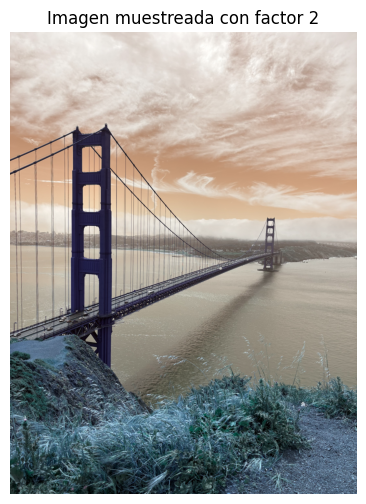


Tamaño original: (5712, 4284, 3)
Tamaño después del muestreo con factor 2: (2856, 2142, 3)
Porcentaje de reducción de datos: 75.00%


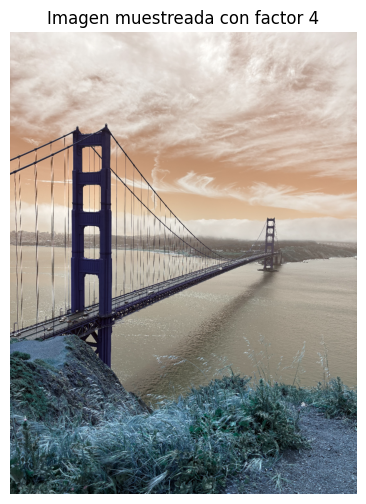


Tamaño original: (5712, 4284, 3)
Tamaño después del muestreo con factor 4: (1428, 1071, 3)
Porcentaje de reducción de datos: 93.75%


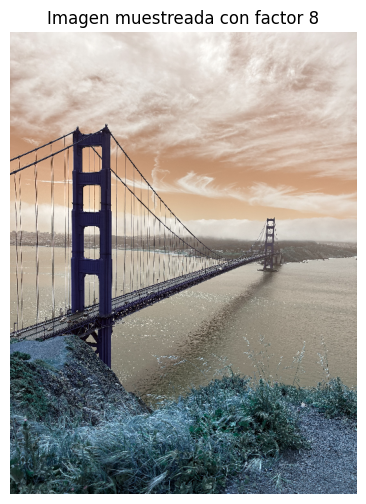


Tamaño original: (5712, 4284, 3)
Tamaño después del muestreo con factor 8: (714, 536, 3)
Porcentaje de reducción de datos: 98.44%


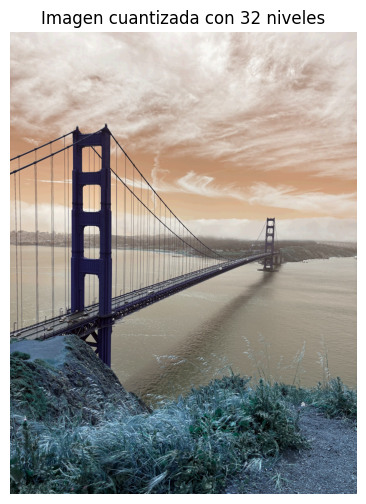

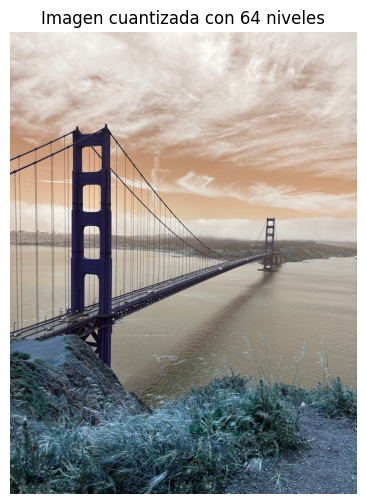

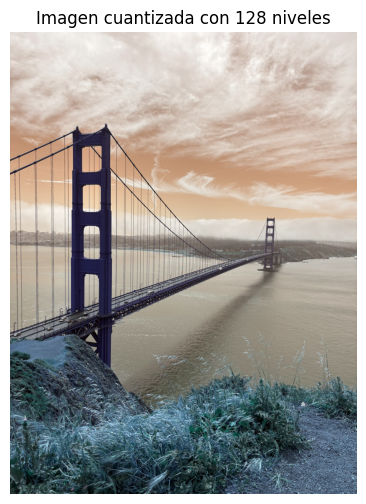

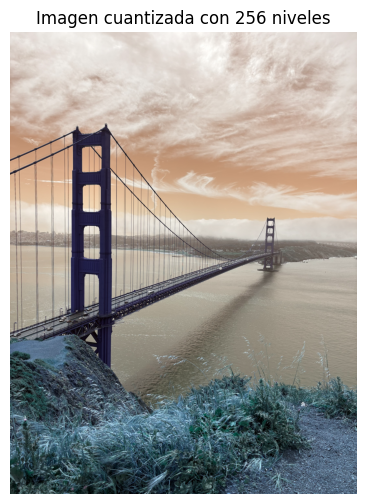

In [42]:
# Función para muestreo espacial (submuestreo)
def submuestreo(image, factor):
    return image[::factor, ::factor]

# Función para cuantización
def cuantizacion(image, niveles):
    # Normalizar la imagen y luego aplicar la cuantización
    return (image // (256 // niveles)) * (256 // niveles)

# Parte A y B: Muestreo con factores 2, 4, 8
factores_muestreo = [2, 4, 8]
for factor in factores_muestreo:
    imagen_muestreada = submuestreo(image, factor)

    # Mostramos imagen muestreada
    plt.figure(figsize=(6,6))
    plt.imshow(imagen_muestreada, cmap='gray')
    plt.title(f'Imagen muestreada con factor {factor}')
    plt.axis('off')
    plt.show()

    # Calculamos el nuevo tamaño
    nuevo_tamano = imagen_muestreada.shape
    porcentaje_reduccion = (1 - (nuevo_tamano[0] * nuevo_tamano[1]) / (image.shape[0] * image.shape[1])) * 100
    print(f"\nTamaño original: {image.shape}")
    print(f"Tamaño después del muestreo con factor {factor}: {nuevo_tamano}")
    print(f"Porcentaje de reducción de datos: {porcentaje_reduccion:.2f}%")

# Parte C: Cuantización con 4 niveles diferentes
niveles_cuantizacion = [32, 64, 128, 256]
for niveles in niveles_cuantizacion:
    imagen_cuantizada = cuantizacion(image, niveles)

    # Mostramos imagen cuantizada
    plt.figure(figsize=(6,6))
    plt.imshow(imagen_cuantizada, cmap='gray')
    plt.title(f'Imagen cuantizada con {niveles} niveles')
    plt.axis('off')
    plt.show()

La degradación visual de la imagen debido a la cuantización se refiere a la pérdida de detalles y la aparición de bloques de color en lugar de transiciones suaves, ya que los niveles de gris se reducen.
¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen? En este caso se puede observar que en el nivel 64. A medida que reducimos el número de niveles, las transiciones de color y las sombras de la imagen se vuelven cada vez más abruptas y menos suaves.

# **Ejercicio 3: Segmentacion por color**


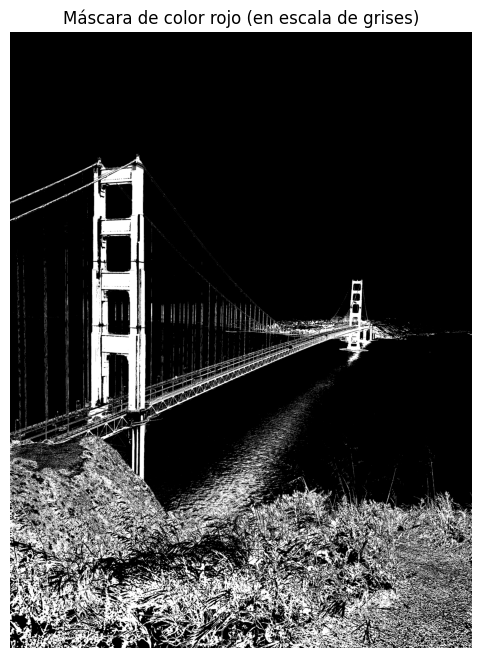

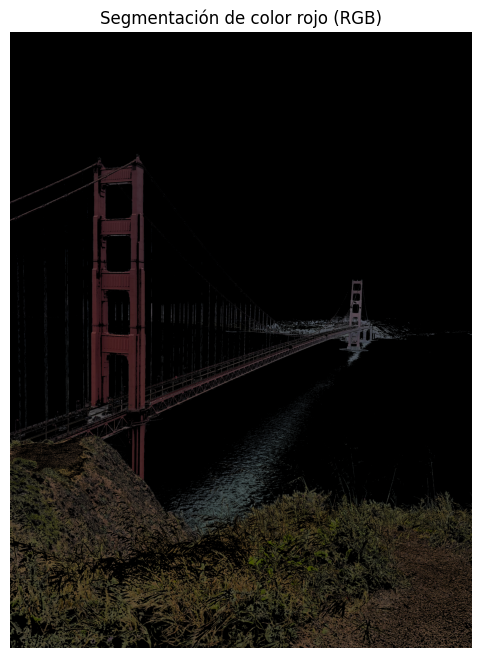

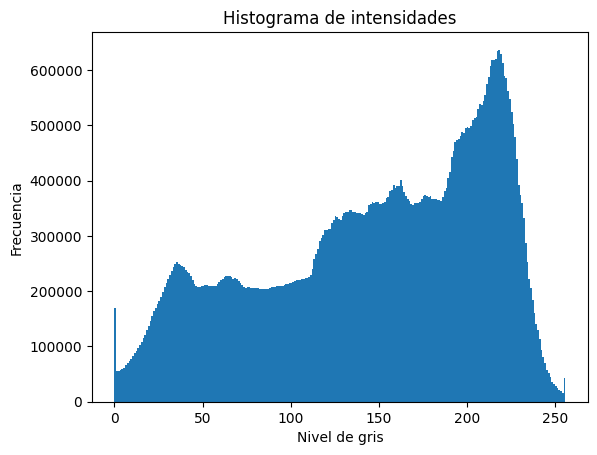

c) Coordenadas del rectángulo:
   x = 0, y = 3540, ancho = 4284, alto = 2172


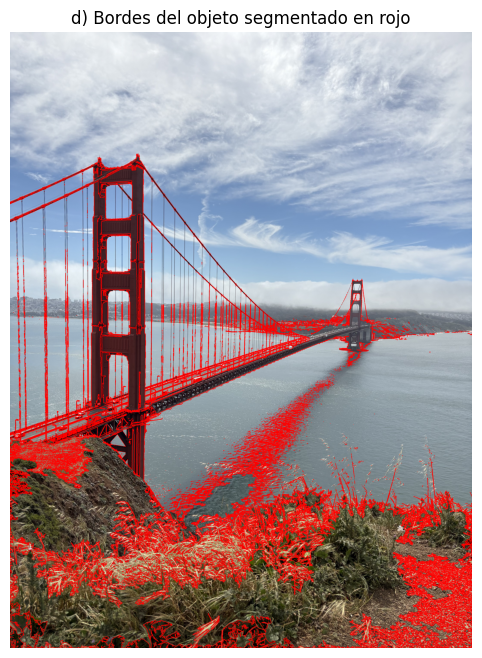

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargamos la imagen
image = cv2.imread('/content/imagen.jpeg')

# Convertimos la imagen de BGR (OpenCV) a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 🔹 a) Definimos  los umbrales para el color rojo en formato RGB

lower_red = np.array([50, 0, 0])    # Rojo más oscuro
upper_red = np.array([255, 100, 100])  # Rojo más claro

# Creamos la máscara para los píxeles que están en el rango de color rojo
mask = cv2.inRange(image_rgb, lower_red, upper_red)

# Mostramos la máscara para ver si los objetos rojos están siendo detectados
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap='gray')
plt.title("Máscara de color rojo (en escala de grises)")
plt.axis('off')
plt.show()

# Aplicamos la máscara a la imagen RGB
segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Mostramos la imagen segmentada
plt.figure(figsize=(8, 8))
plt.imshow(segmented)
plt.title("Segmentación de color rojo (RGB)")
plt.axis('off')
plt.show()

# 🔹 b) Calculamos y mostramos el histograma de la imagen en escala de grises
# Convertir la imagen original a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculamos el histograma de la imagen en escala de grises
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Mostramos el histograma
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title("Histograma de intensidades")
plt.xlabel("Nivel de gris"); plt.ylabel("Frecuencia")
plt.show()

# 🔹 c) Encontramos las coordenadas del rectángulo que encierra el objeto segmentado
# Encontrar contornos a partir de la máscara
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Seleccionamos el contorno más grande
    largest_contour = max(contours, key=cv2.contourArea)

    # Obtenemos el rectángulo que lo encierra
    x, y, w, h = cv2.boundingRect(largest_contour)
    print(f"c) Coordenadas del rectángulo:")
    print(f"   x = {x}, y = {y}, ancho = {w}, alto = {h}")
else:
    print("No se encontraron contornos.")

# 🔹 d) Dibujamos los bordes del objeto segmentado en color rojo
# Crear una copia de la imagen original para dibujar los bordes
image_with_borders = image.copy()

# Dibujamos los contornos en color rojo (BGR: (0, 0, 255)) con un grosor de 3
cv2.drawContours(image_with_borders, contours, -1, (0, 0, 255), 3)

# Mostramos la imagen con los bordes
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_with_borders, cv2.COLOR_BGR2RGB))
plt.title("d) Bordes del objeto segmentado en rojo")
plt.axis('off')
plt.show()


Conclusion: En este trabajo mostramos cómo segmentar imágenes para extraer objetos de un color específico utilizando los umbrales de los canales RGB.
Pudimos ver que por egmentación por color, podemos extraer objetos de un color definido ajustando los umbrales en los canales RGB. Sin embargo, es importante ajustar bien los valores de umbral para que se detecten correctamente los objetos deseados.
Con el histograma pudimos entender la distribución de intensidades de los píxeles en la imagen.
Usando los contornos, podemos encontrar y delimitar los objetos segmentados y al dibujar los bordes de los objetos segmentados, podemos verificar si la segmentación se ha realizado correctamente.

